In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn (linear) models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# XGBoost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier

# Categorical models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv(r"C:\Users\Hope Akpan\Downloads\gym_members_exercise_tracking.csv")
df = pd.read_csv("gym_members_exercise_tracking.csv")

In [3]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


In [5]:
df.shape

(973, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [8]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [11]:
categorical_df = df.select_dtypes(include='object')
numerical_df = df.select_dtypes(exclude='object')

In [12]:
# class distribution
for column in categorical_df:
    print(df.groupby(column).size())

Gender
Female    462
Male      511
dtype: int64
Workout_Type
Cardio      255
HIIT        221
Strength    258
Yoga        239
dtype: int64


In [13]:
# Check for skewness
for column in numerical_df.columns:
    print(column)
    print(df[column].skew())
    print("\n")

Age
-0.07786396227519052


Weight (kg)
0.7723839981033492


Height (m)
0.33885837248155437


Max_BPM
-0.03795048556603578


Avg_BPM
0.08636095904568168


Resting_BPM
-0.07163590154303973


Session_Duration (hours)
0.0257610266883642


Calories_Burned
0.2783210950013363


Fat_Percentage
-0.6352246756335007


Water_Intake (liters)
0.0714799015154608


Workout_Frequency (days/week)
0.14981455950721353


Experience_Level
0.31851314428157884


BMI
0.7636478559612702




EDA

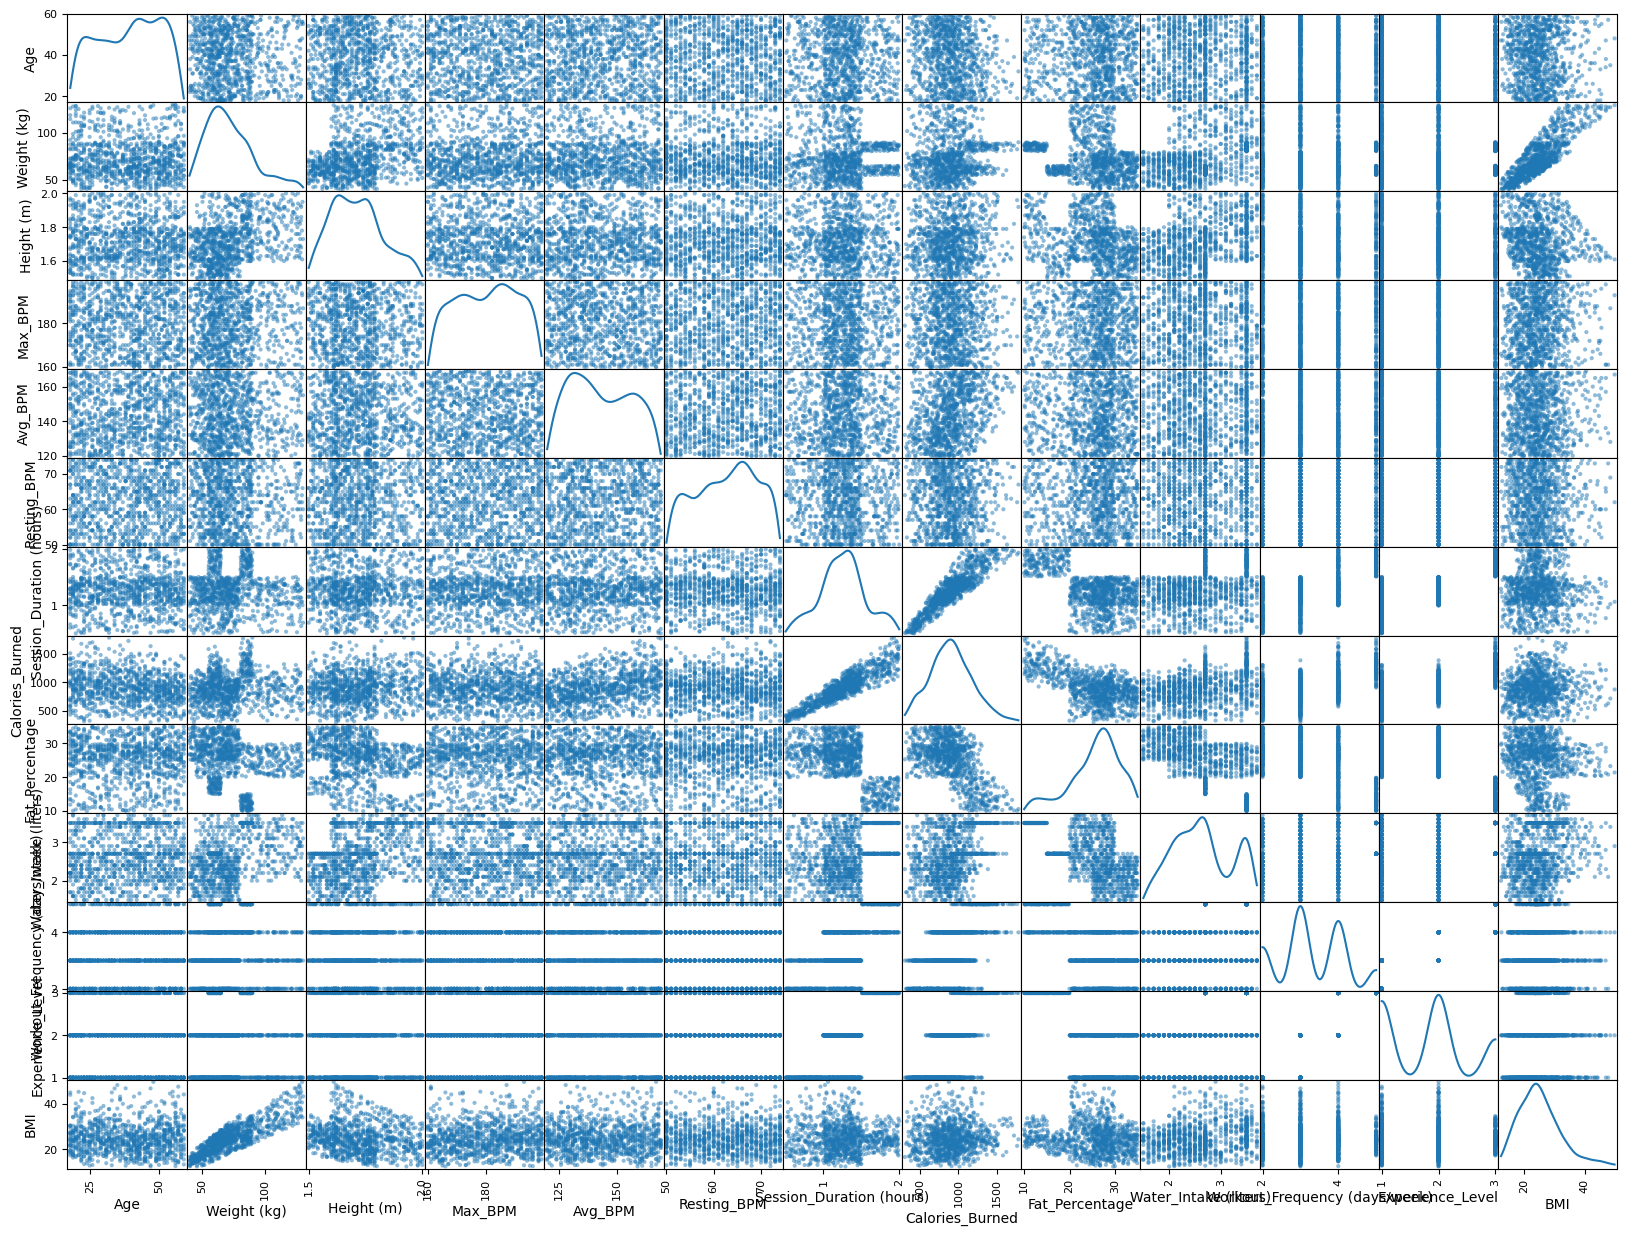

In [14]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(numerical_df, figsize=(20,15), diagonal='kde')
#df.plot(kind='scatter', subplots=True, layout=(4,4), legend=True, figsize=(20,15))
plt.show()
#sns.pairplot(numerical_df)  # 'corner=True' removes duplicate plots
#plt.show()

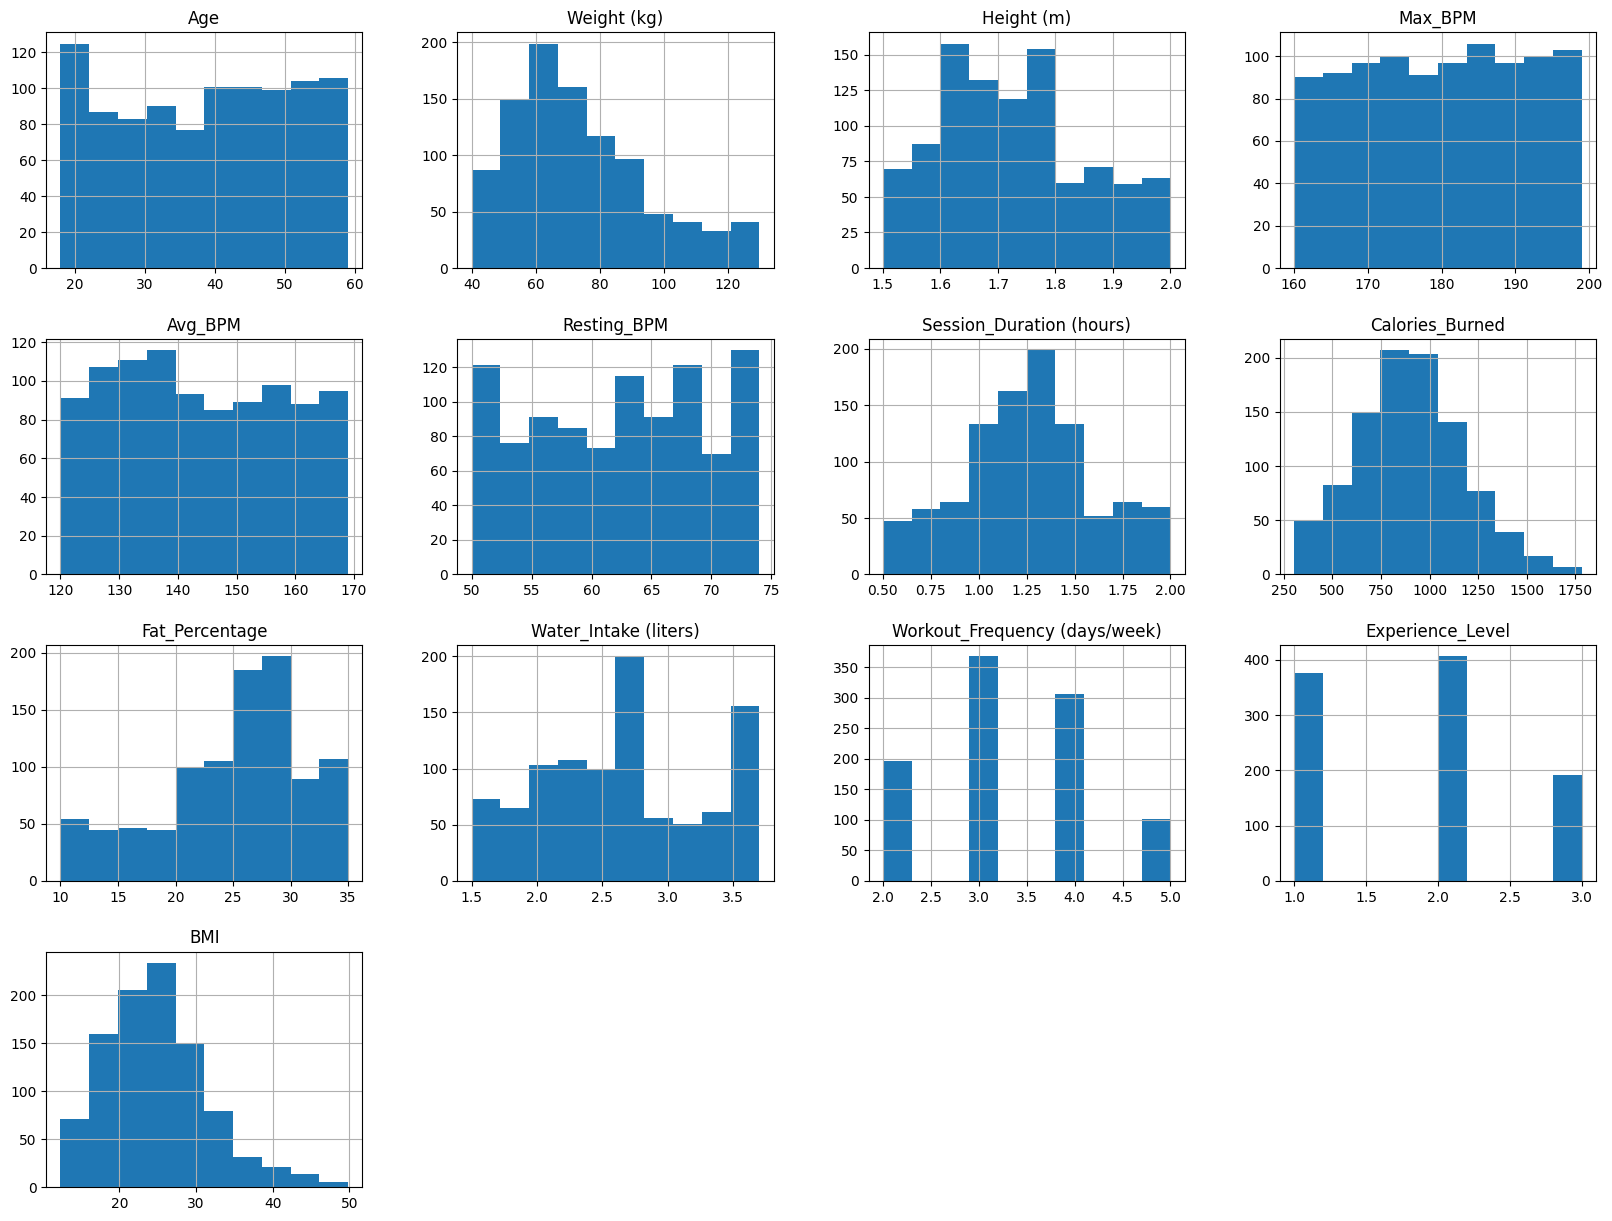

In [15]:
# Data Distribution with Histograms
df.hist(figsize=(20,15))
plt.show()

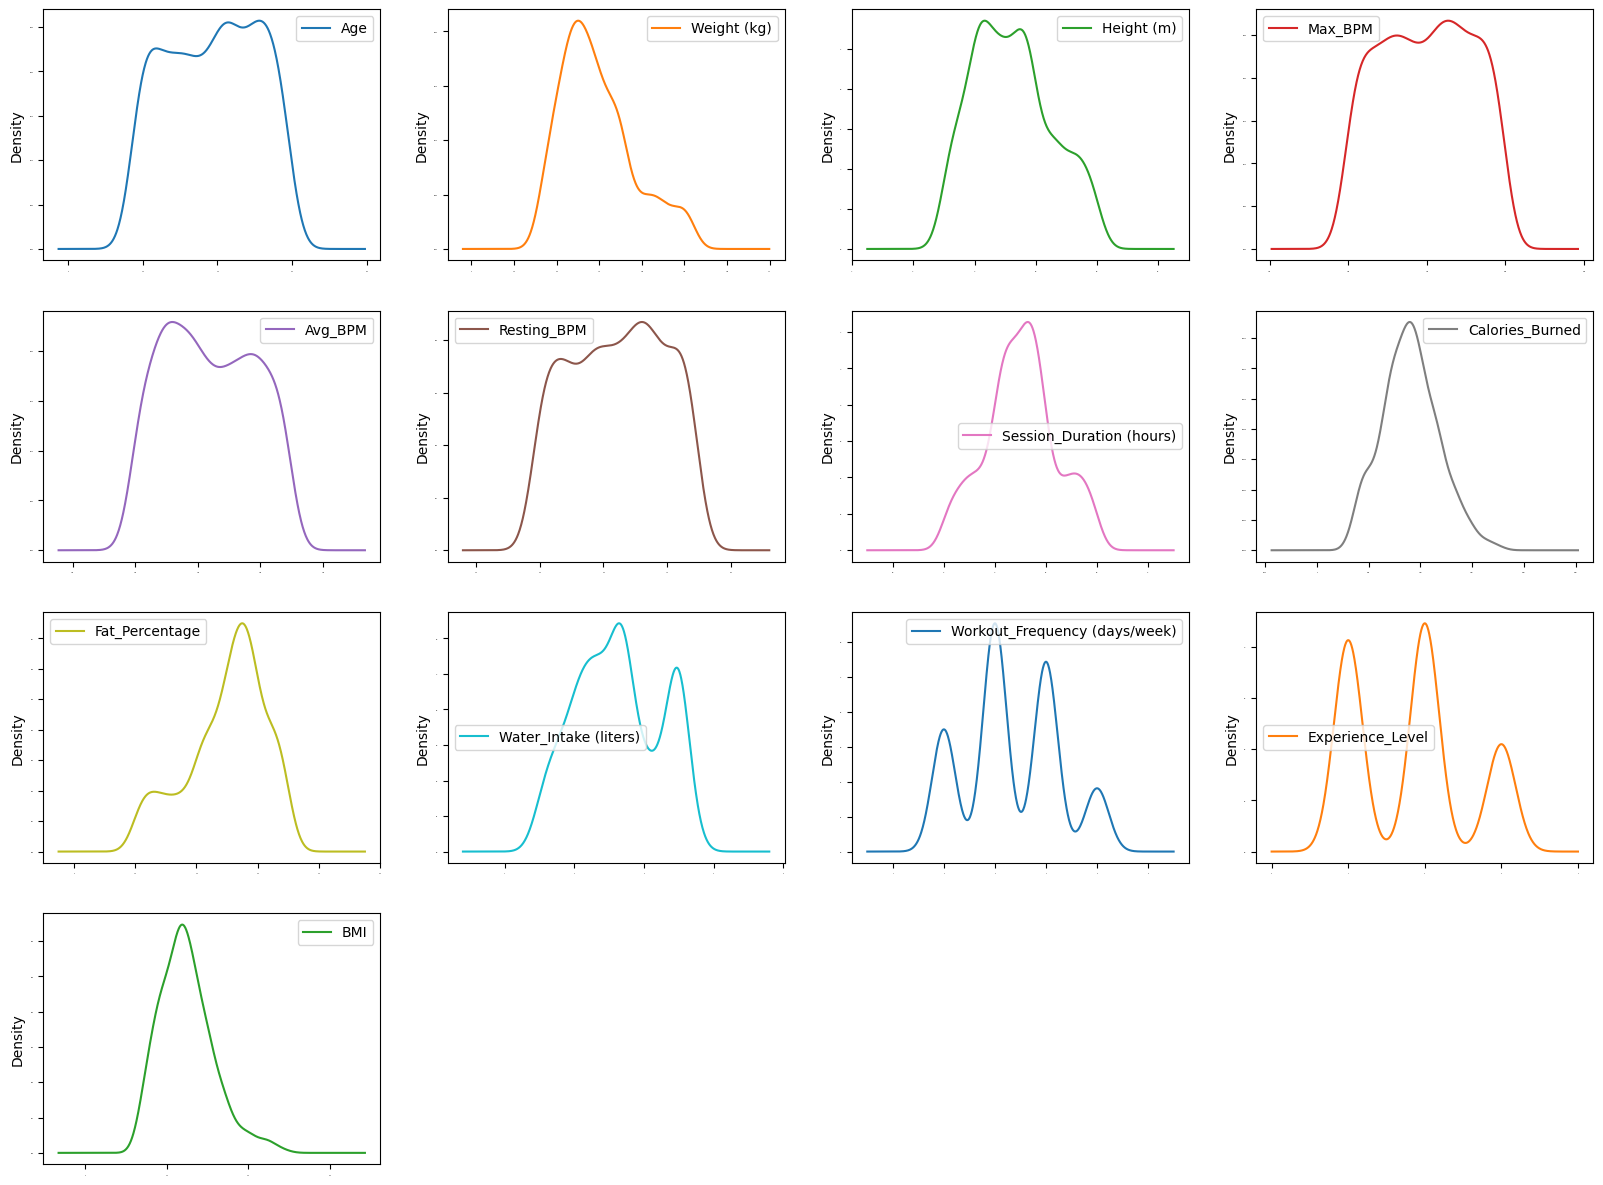

In [16]:
 # density
 df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, legend=True, figsize=(20,15), fontsize=1)
 plt.show()

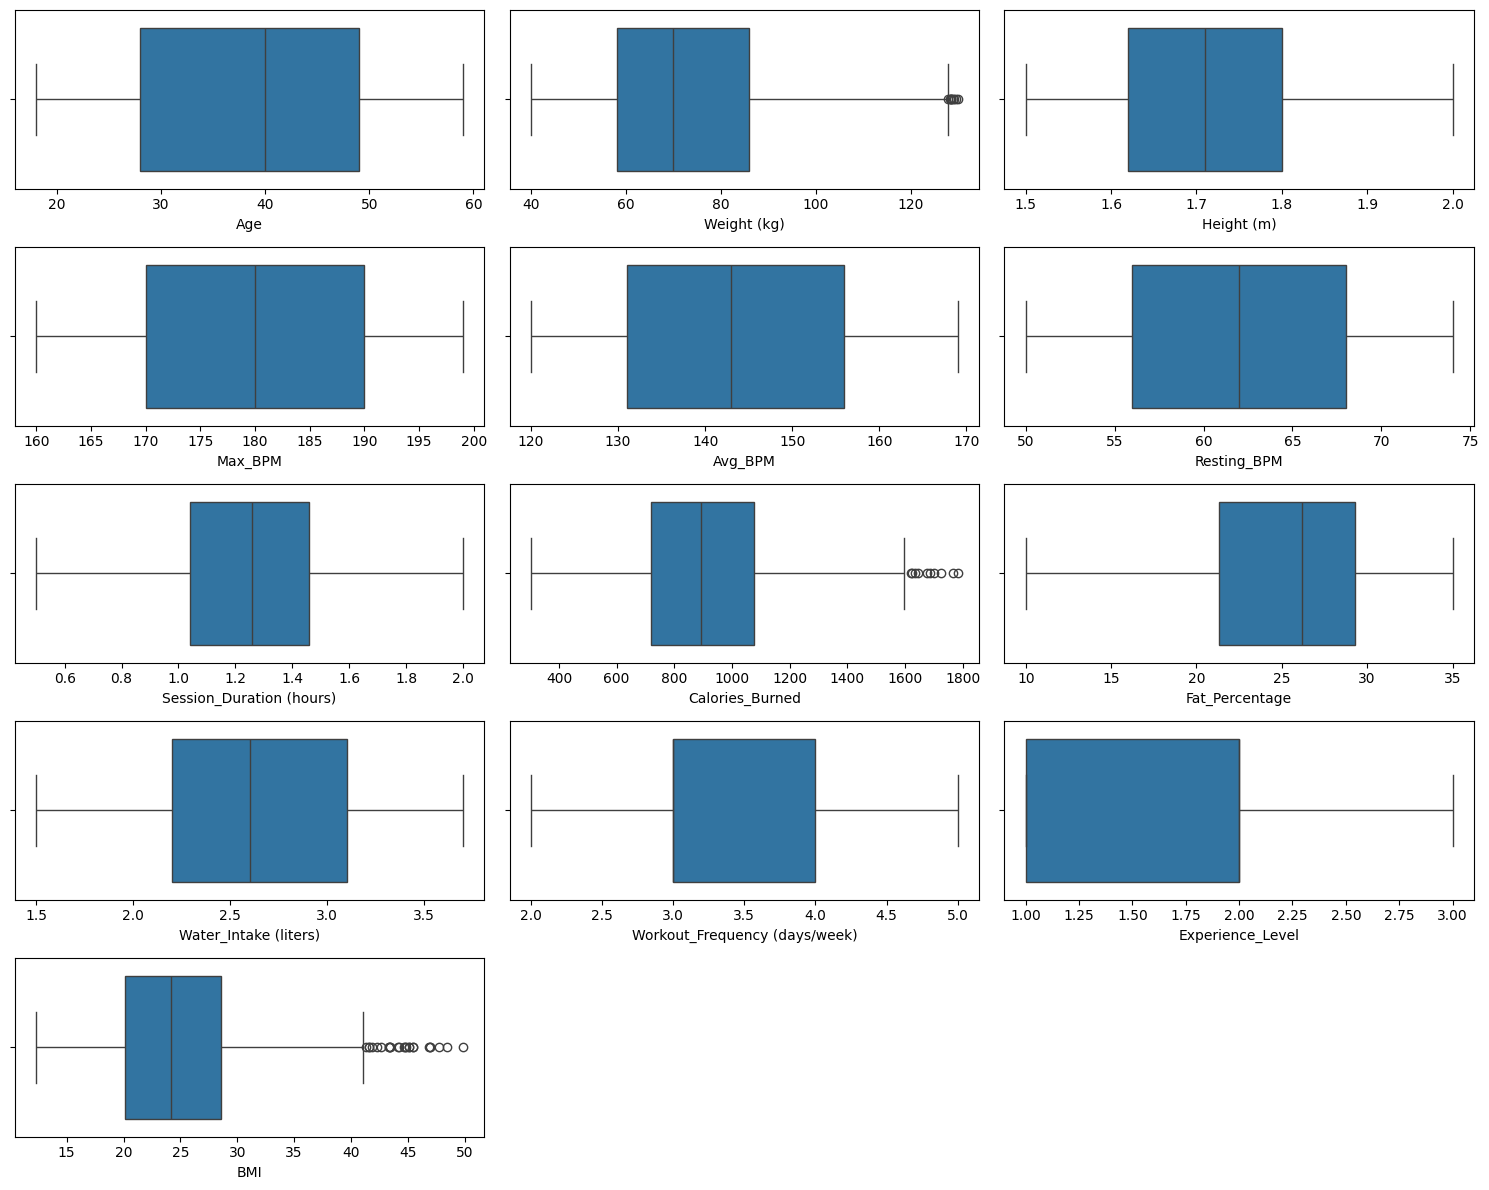

In [17]:
# Box plots to check for outliers
plt.figure(figsize = (15,12))

num_plots = len(numerical_df.columns)  # Count numerical columns
rows = (num_plots // 3) + (num_plots % 3 > 0)  # Adjust row count
for i, cols in enumerate(numerical_df.columns):
    plt.subplot(rows,3,i+1)
    sns.boxplot(data = numerical_df,x = cols)
plt.tight_layout()
plt.show()

In [18]:
"""
# Label Encoding (Converting Categorical to Numerical Data)
le =  LabelEncoder()

# Creating a copy to avoid modifying the original DataFrame
encoded_categorical_df = categorical_df.copy()

for i in range(0 , encoded_categorical_df.shape[1]): # shape gives [row, column]. So, this returns column
    encoded_categorical_df.iloc[:,i] = le.fit_transform(encoded_categorical_df.iloc[:,i]) # iloc locates the column

"""

'\n# Label Encoding (Converting Categorical to Numerical Data)\nle =  LabelEncoder()\n\n# Creating a copy to avoid modifying the original DataFrame\nencoded_categorical_df = categorical_df.copy()\n\nfor i in range(0 , encoded_categorical_df.shape[1]): # shape gives [row, column]. So, this returns column\n    encoded_categorical_df.iloc[:,i] = le.fit_transform(encoded_categorical_df.iloc[:,i]) # iloc locates the column\n\n'

In [19]:
# To be able to Show the mappings 

# Creating a copy to avoid modifying the original DataFrame
encoded_categorical_df = categorical_df.copy()

# Dictionary to store label mappings
label_mappings = {}

# Encoding each column
le = LabelEncoder()
for column in encoded_categorical_df.columns:
    encoded_categorical_df[column] = le.fit_transform(encoded_categorical_df[column])
    # Storing the mapping for each column
    label_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(encoded_categorical_df)

# Display the mappings
print("\nLabel Mappings:")
for column, mapping in label_mappings.items():
    print(f"\n{column}:")
    for original, encoded in mapping.items():
        print(f"  '{original}' -> {encoded}")


Encoded DataFrame:
     Gender  Workout_Type
0         1             3
1         0             1
2         0             0
3         1             2
4         1             2
..      ...           ...
968       1             2
969       1             2
970       0             0
971       1             1
972       1             2

[973 rows x 2 columns]

Label Mappings:

Gender:
  'Female' -> 0
  'Male' -> 1

Workout_Type:
  'Cardio' -> 0
  'HIIT' -> 1
  'Strength' -> 2
  'Yoga' -> 3


In [20]:
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

In [21]:
encoded_df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,2


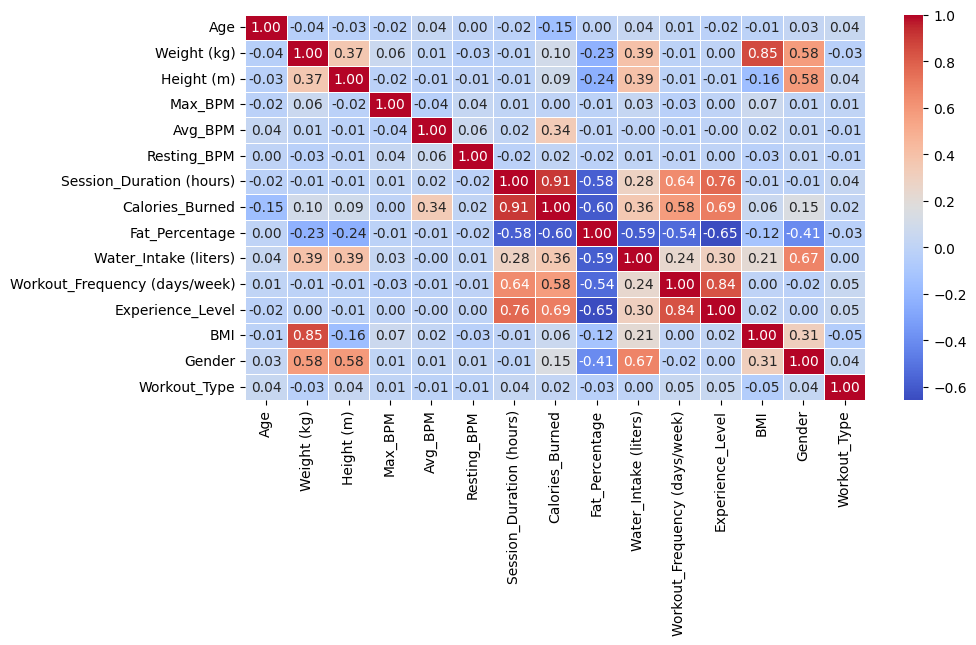

In [22]:
# Compute the correlation matrix
corr_matrix = encoded_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True , linewidths = 0.5)
plt.show()

Create Multiple Models to compare

In [23]:
# MODEL

x = encoded_df.drop(columns=['Calories_Burned'])
y = encoded_df['Calories_Burned']
# Train-test split (80% train, 20% test) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ML regression models (Dictionaries)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "XGBoost Regressor": XGBRegressor()
}

# Train and evaluate models
r_squared_values = {}
mse = {}
mae = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    r_squared_values[name] = r_squared * 100
    mse[name] = mean_squared_error(y_test, y_pred)
    mae[name] = mean_absolute_error(y_test, y_pred)

In [24]:
print(f"r2_score = {r_squared_values}")
print(f"Mean Squared Error = {mse}")
print(f"Mean Absolute Error = {mae}")

r2_score = {'Linear Regression': 98.03427065691753, 'Random Forest Regressor': 97.3383031212426, 'Support Vector Regressor (SVR)': 16.471646068609967, 'K-Nearest Neighbors Regressor': 83.62381330572883, 'Decision Tree Regressor': 94.03416425496131, 'XGBoost Regressor': 98.060970910604}
Mean Squared Error = {'Linear Regression': 1639.910208499723, 'Random Forest Regressor': 2220.5213035897436, 'Support Vector Regressor (SVR)': 69683.55068478879, 'K-Nearest Neighbors Regressor': 13661.837948717946, 'Decision Tree Regressor': 4977.0, 'XGBoost Regressor': 1617.6355150155628}
Mean Absolute Error = {'Linear Regression': 30.216457302852813, 'Random Forest Regressor': 35.555897435897435, 'Support Vector Regressor (SVR)': 210.85241164397587, 'K-Nearest Neighbors Regressor': 92.05948717948718, 'Decision Tree Regressor': 52.84615384615385, 'XGBoost Regressor': 26.971642753405447}
